In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from os import listdir
from os.path import isfile, join

In [2]:
def get_results(folder):
    files = [join(folder,f) for f in listdir(folder) if isfile(join(folder,f))]
    results_all = []
    for filename in files:
        with open(filename) as f:
            results_all.append(json.load(f))

    greedy_area = np.zeros(len(results_all))
    optimal_area = np.zeros(len(results_all))
    indicator_tmp = np.zeros(len(results_all), dtype = bool)
    for i in range(len(results_all)):
        greedy_area[i] = results_all[i]['greedy_area']
        optimal_area[i] = results_all[i]['optimal_area']
        indicator_tmp[i] = results_all[i]['indicator_tmp']

    deviation = (greedy_area - optimal_area)/greedy_area*100
    ind_not_tmp = [not elem for elem in indicator_tmp]
    
    return {'results_all': results_all, 
            'greedy_area': greedy_area, 
            'optimal_area': optimal_area, 
            'indicatior_tmp': indicator_tmp, 
            'deviation': deviation}

In [3]:
folder_name = '../sherlock' # change to folder of greedy eval output
folders = [f for f in listdir('folder_name') if f.startswith('results')]
num_damaged = np.array([int(f.split('_')[1]) for f in folders])
total_building = np.array([int(f.split('_')[2]) for f in folders])

In [4]:
all_results = {}
for i in range(len(folders)):
    all_results[(num_damaged[i], total_building[i])] = get_sherlock_results(folder_name + folders[i])

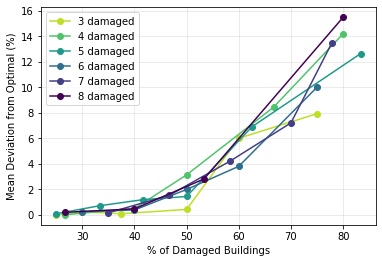

In [5]:
num_damaged_unique = np.unique(num_damaged)
colors = plt.cm.viridis_r(np.linspace(0.1,1,len(num_damaged_unique)))

plt.figure()
j = 0
for i in num_damaged_unique:
    damaged_idx = np.argwhere(num_damaged == i).flatten()
    total_building_filter = total_building[damaged_idx]

    x_data = np.round(i/np.array(total_building_filter)*100,2)
    y_data = np.array([np.mean(all_results[(i,j)]['deviation']) for j in total_building_filter])
    x_data, y_data = zip(*sorted(zip(x_data,y_data)))
    plt.plot(x_data,y_data, color = colors[j], marker = 'o', label = '{} damaged'.format(i))
    j += 1
plt.xlabel('% of Damaged Buildings')
plt.ylabel('Mean Deviation from Optimal (%)')
plt.grid(alpha = 0.3)
plt.legend()
plt.savefig('figures/greedy_eval.png', dpi = 600)
plt.show()